# Take Home Assignment

###Introduction and Dataset Description

Student performance dataset depicts student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features and it was collected by using school reports and questionnaires.
Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por).

Dataset available at: https://doi.org/10.24432/C5TG7T <br>
Domain: Education, student achievement prediction.<br>
Attributes: ~33 including student info (age, sex, family), social (activities, alcohol use), school support, etc.<br>
Target: G3 (final grade out of 20).

###Data Loading

In [1]:
#Import required libraries
import pandas as pd

#Load datasets
mat = pd.read_csv("/content/student-mat.csv", header=None)
por = pd.read_csv("/content/student-por.csv", header=None)

##Math report
#Split the single column into multiple columns
mat = mat[0].str.split(";", expand=True)

#Set the first row as header
mat.columns = mat.iloc[0]
mat_data = mat.drop(index=0).reset_index(drop=True)

##Portugees report
#Split the single column into multiple columns
por = por[0].str.split(";", expand=True)

#Set the first row as header
por.columns = por.iloc[0]
por_data = por.drop(index=0).reset_index(drop=True)

#Show basic info
print("Mathematics dataset shape:", mat_data.shape)
print("Portuguese dataset shape:", por_data.shape)

# Preview first rows
mat_data.head()

Mathematics dataset shape: (395, 33)
Portuguese dataset shape: (649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,6,"""5""","""6""",6
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,4,"""5""","""5""",6
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,10,"""7""","""8""",10
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,2,"""15""","""14""",15
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,4,"""6""","""10""",10


In [2]:
por_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,4,"""0""","""11""",11
1,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,2,"""9""","""11""",11
2,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,6,"""12""","""13""",12
3,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,0,"""14""","""14""",14
4,GP,"""F""",16,"""U""","""GT3""","""T""",3,3,"""other""","""other""",...,4,3,2,1,2,5,0,"""11""","""13""",13


In [3]:
#Columns we expect to be numeric but may have quotes
numeric_cols = ['G1', 'G2']

#Remove quotes and convert to numeric in Maths
for col in numeric_cols:
    mat_data[col] = (
        mat_data[col]
        .astype(str)
        .str.strip()
        .str.replace('"', '', regex=False)
    )
    mat_data[col] = pd.to_numeric(mat_data[col], errors='coerce')

#Remove quotes and convert to numeric in Portugees
for col in numeric_cols:
    por_data[col] = (
        por_data[col]
        .astype(str)
        .str.strip()
        .str.replace('"', '', regex=False)
    )
    por_data[col] = pd.to_numeric(por_data[col], errors='coerce')

In [4]:
#Convert columns to numeric
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
mat_data[numeric_cols] = mat_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

#Convert colums to categorical
categorical_cols = ['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
mat_data[categorical_cols] = mat_data[categorical_cols].astype('category')

print(mat_data.dtypes)

0
school        category
sex             object
age              int64
address       category
famsize       category
Pstatus       category
Medu             int64
Fedu             int64
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
dtype: object


In [5]:
#Convert columns to numeric
numeric_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G3']
por_data[numeric_cols] = por_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

#Convert colums to categorical
categorical_cols = ['school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
por_data[categorical_cols] = por_data[categorical_cols].astype('category')

print(por_data.dtypes)

0
school        category
sex             object
age              int64
address       category
famsize       category
Pstatus       category
Medu             int64
Fedu             int64
Mjob          category
Fjob          category
reason        category
guardian      category
traveltime       int64
studytime        int64
failures         int64
schoolsup       object
famsup          object
paid            object
activities      object
nursery         object
higher          object
internet        object
romantic        object
famrel           int64
freetime         int64
goout            int64
Dalc             int64
Walc             int64
health           int64
absences         int64
G1               int64
G2               int64
G3               int64
dtype: object


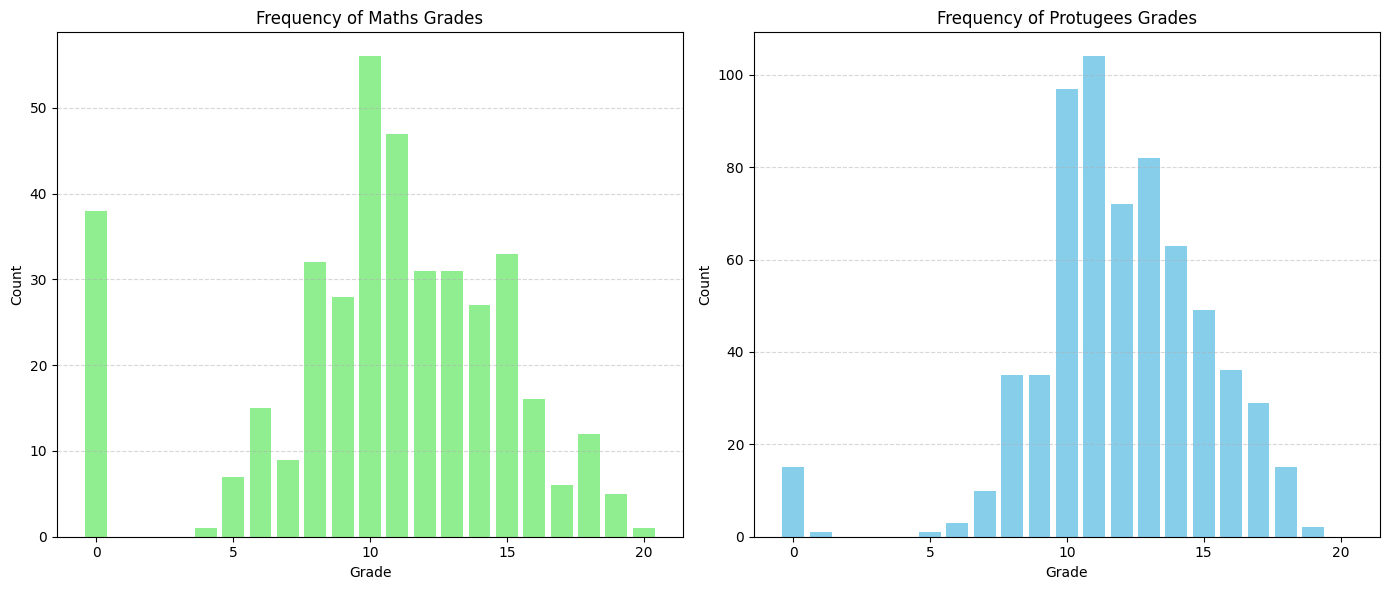

In [6]:
import matplotlib.pyplot as plt

# Count occurrences of each value
math_G3 = mat_data['G3'].value_counts().sort_index()
por_G3 = por_data['G3'].value_counts().sort_index()

# Ensure all values from 0 to 20 are represented
full_range = pd.Series(0, index=range(0, 21))
counts_complete1 = full_range.add(math_G3, fill_value=0).astype(int)
counts_complete2 = full_range.add(por_G3, fill_value=0).astype(int)

# Display the result
# print(counts_complete1)
# print(counts_complete2)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Maths frequency
axes[0].bar(counts_complete1.index, counts_complete1.values, color='lightgreen')
axes[0].set_title('Frequency of Maths Grades')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Count')
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Plot G3 frequency
axes[1].bar(counts_complete2.index, counts_complete2.values, color='skyblue')
axes[1].set_title('Frequency of Protugees Grades')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Count')
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout
plt.tight_layout()
plt.show()

Above true value graphs give clear overview of what the models should predict. It is very much like a Gausian distribution (Bell Shaped curve).

There are queit a lot of zeros. Need to do Feature Engineering.

### Data Preprocessing

First, check whether there are missing values.

In [10]:
# Step 4: Check for missing values
print("Missing values in math dataset:\n", mat.isnull().sum().sum())
print("Missing values in por dataset:\n", por.isnull().sum().sum())

# Step 5: Inspect categorical columns
categorical_cols = mat_data.select_dtypes(include=["object"]).columns
print("Categorical columns:", categorical_cols.tolist())

# Step 6: Encode categorical variables (convert to numbers)
mat_encoded = pd.get_dummies(mat, drop_first=True)
# por_encoded = pd.get_dummies(por, drop_first=True)

print("Math dataset after encoding:", mat_encoded.shape)


Missing values in math dataset:
 0
Missing values in por dataset:
 0
Categorical columns: ['sex', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Math dataset after encoding: (396, 189)


Then, We can get into a heatmap of full correlation matrix.

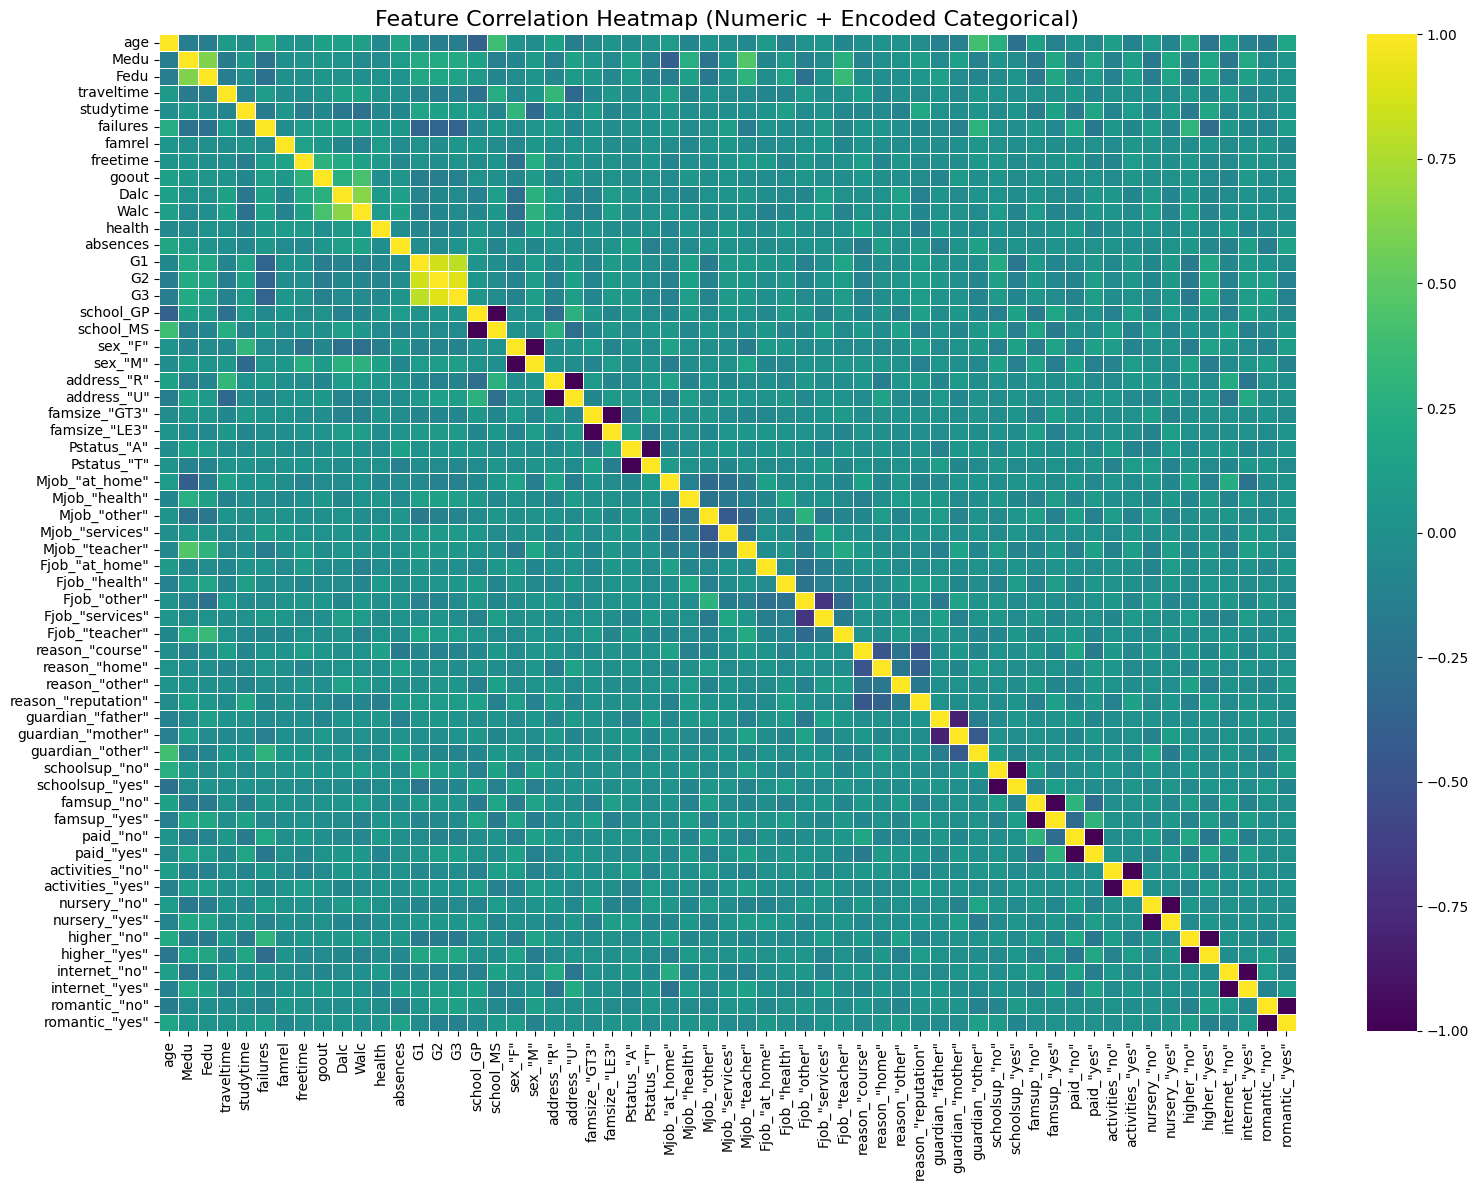

/tmp/ipython-input-3774906180.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=g3_corr.values, y=g3_corr.index, palette="plasma")


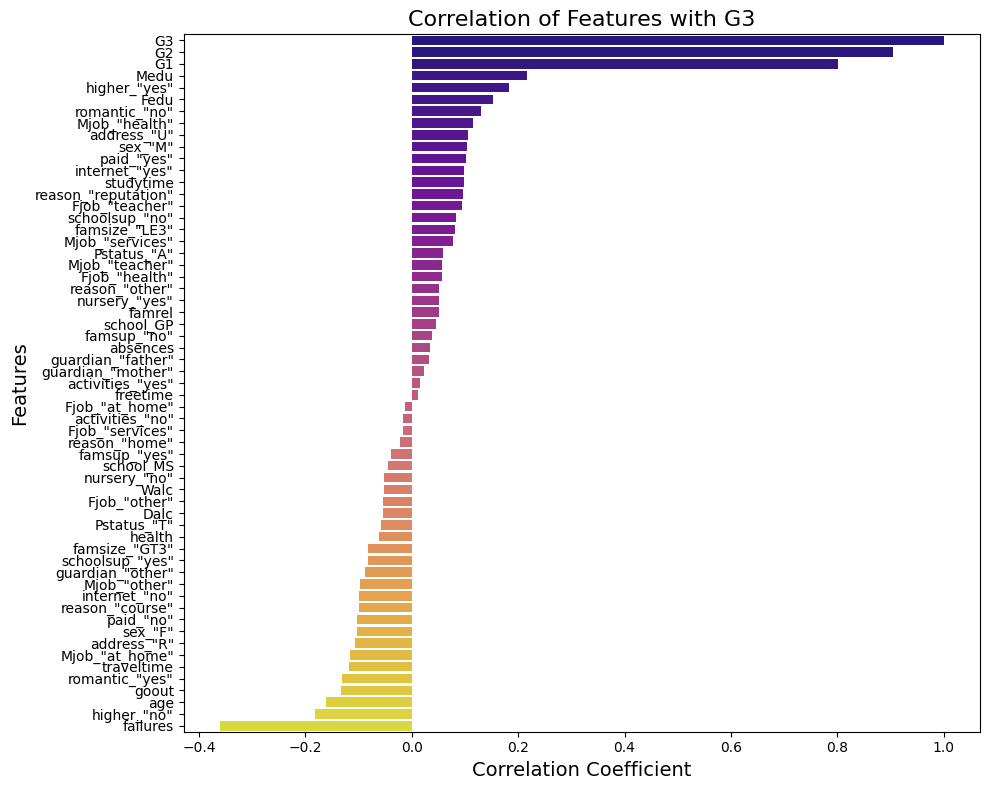

In [7]:
import seaborn as sns

#One-hot encode categorical features - because categorical feature must be converted to numerical values before appling correlation
mat_encoded = pd.get_dummies(mat_data, drop_first=False)

#Compute full correlation matrix
corr_matrix = mat_encoded.corr()

#Plot heatmap of full correlation matrix
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, cmap="viridis", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap (Numeric + Encoded Categorical)", fontsize=16)
plt.tight_layout()
plt.show()

#Correlation of each feature with G3
g3_corr = corr_matrix['G3'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=g3_corr.values, y=g3_corr.index, palette="plasma")
plt.title("Correlation of Features with G3", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=14)
plt.ylabel("Features", fontsize=14)
plt.tight_layout()
plt.show()

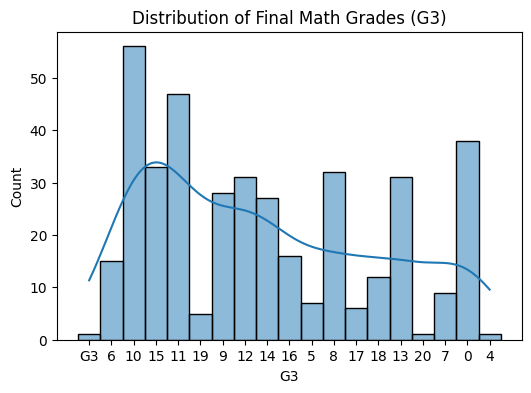

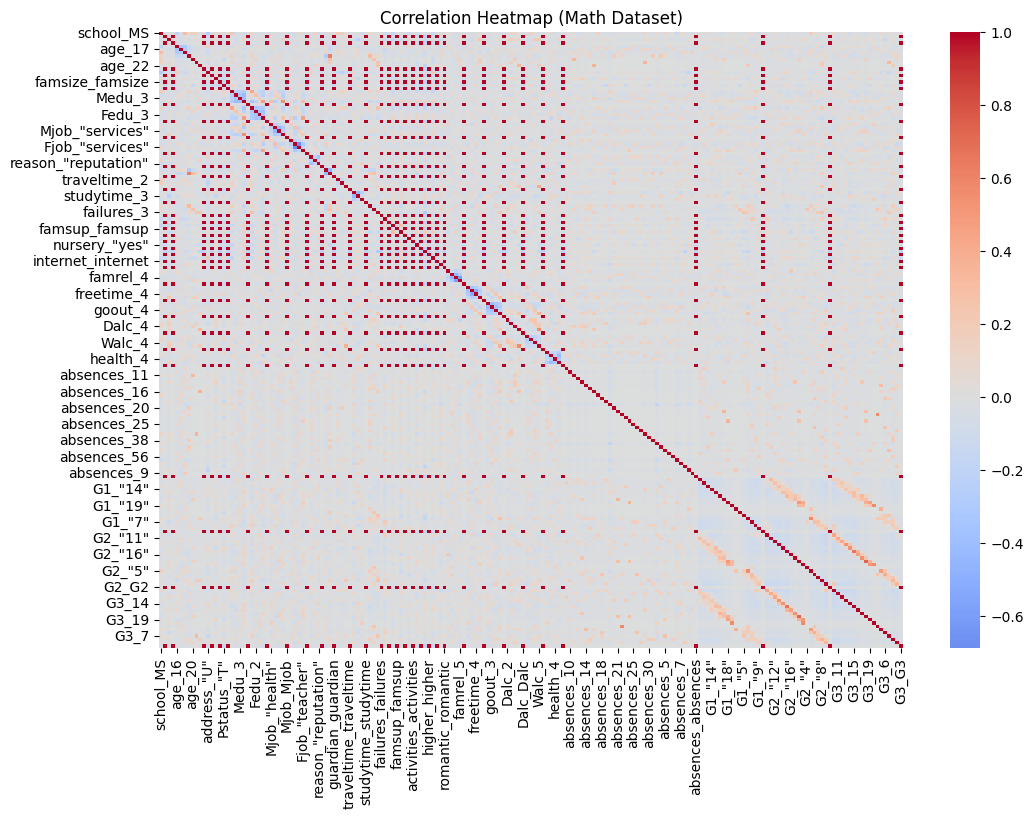

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of final grade (G3)
plt.figure(figsize=(6,4))
sns.histplot(mat["G3"], bins=20, kde=True)
plt.title("Distribution of Final Math Grades (G3)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(mat_encoded.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Math Dataset)")
plt.show()

###Ensemble Learning

In [ ]:
import pandas as pd

# Load both datasets
d1 = pd.read_csv("/content/student-mat.csv", sep=";")
d2 = pd.read_csv("/content/student-por.csv", sep=";")

# Keys for merging (same as in the R code)
merge_keys = ["school","sex","age","address","famsize","Pstatus",
              "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]

# Merge on those keys, add suffixes to distinguish subjects
d3 = pd.merge(d1, d2, on=merge_keys, suffixes=("_math", "_por"))

print("Number of merged students:", len(d3))  # should be 382

# Save to CSV
d3.to_csv("student-mat-por-merged.csv", index=False, sep=";")
print("Merged CSV saved as 'student-mat-por-merged.csv'")

Number of merged students: 382
Merged CSV saved as 'student-mat-por-merged.csv'


In [ ]:
import pandas as pd

# Load both datasets
d1 = pd.read_csv("/content/student-mat.csv", sep=";")
d2 = pd.read_csv("/content/student-por.csv", sep=";")

# Keys for merging
merge_keys = ["school","sex","age","address","famsize","Pstatus",
              "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]

# Merge with suffixes
d3 = pd.merge(d1, d2, on=merge_keys, suffixes=("_math", "_por"))

# Take non-grade features from the _math side (to avoid duplicates)
non_grade_features = [
    "guardian_math","traveltime_math","studytime_math","failures_math",
    "schoolsup_math","famsup_math","paid_math","activities_math",
    "higher_math","romantic_math","famrel_math","freetime_math",
    "goout_math","Dalc_math","Walc_math","health_math","absences_math"
]

# Keep merge keys + selected features + grade features
grade_features = ["G1_math", "G2_math", "G3_math",
                  "G1_por", "G2_por", "G3_por"]

final_df = d3[merge_keys + non_grade_features + grade_features]

# Rename the non-grade features back to original names (drop _math suffix)
final_df = final_df.rename(columns=lambda x: x.replace("_math", ""))

print("Number of merged students:", len(final_df))  # should be 382

# Save
final_df.to_csv("student-mat-por-merged.csv", index=False, sep=";")
print("Merged CSV saved as 'student-mat-por-merged.csv'")


Number of merged students: 382
Merged CSV saved as 'student-mat-por-merged.csv'
